# Plotting graphs for paper
This notebook takes the results produced in the end2end notebook, and prepares a collection of plots used in the accompanying paper.

It requires a `all_metrics.csv` with the results for a given `model_name`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/tmp/ipykernel_282685/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path_to_all_metrics = "results/shag1_melville2_train_turret1_val/all_metrics.csv"
results_df = pd.read_csv(path_to_all_metrics)

### Plot graphs summarising the results

#### Handling different naming conventions

In [3]:
# Add train,valid,test label
split = {
    "shag1": "train",
    "shag_extra1": "train",
    "melville2": "train",

    "turret1": "valid",

    "shag2": "test-over_time",
    "turret2": "test-over_time",
    "melville3": "test-over_time",
    "new_islands1": "test-over_location",
    "kgi_west2": "test-over_source",
    "nelson1": "test-over_source",
    "fregata1": "test-over_source",
    "kwarecki1": "test-over_source",
    "rzepecki1": "test-over_source",
    "unnamed_c1": "test-over_source",
}
results_df["split"] = results_df.location.apply(lambda location: split[location] if location in split.keys() else "test-over_source")

# combine location and image_id
results_df["loc__image_id"] = results_df["location"] + "-" + results_df["image_id"]

# label for train and valid plots
results_df["image"] = results_df.apply(
    lambda row: "Shag_" + row.image_id if (row.location == "shag1" or row.location == "shag_extra1") else \
                (row.image_id if row.location.startswith("melville") else \
                ("Turret_" + row.image_id if row.location.startswith("turret1") else row.image_id)),
    axis = 1
)

# Add unified naming of images
uni_name = pd.read_csv("plots_for_paper/utils/uni_name.csv")
results_df = results_df.merge(uni_name, on="image_id", how="left")

print(results_df)

      location_x                                       image_id  n_preds  \
0      melville2              Mellvile_Phantom_lot_1_2022_12_04      460   
1      melville2                      Melville_Inspire_22_12_12      461   
2          shag1                                  Shag_19_11_26       69   
3          shag1                                  Shag_19_12_20       62   
4          shag1                                  Shag_20_01_30       60   
5          shag1                                  Shag_20_02_22       60   
6          shag1                                  Shag_20_09_20       55   
7          shag1                                  Shag_20_10_08       57   
8          shag1                                  Shag_20_11_15       74   
9          shag1                                  Shag_20_12_19       71   
10         shag1                                  Shag_20_12_26       71   
11         shag1                                  Shag_21_01_12       71   
12         s

#### Setup Maven font for graphs

In [4]:
from matplotlib.font_manager import fontManager, FontProperties

path = 'plots_for_paper/utils/MavenPro-Medium.ttf'
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())

#### Setup plot colors

In [5]:
train_color = "#15354a"
valid_color = "#0b67a2"
test_color = "#0099f9"
test_pale_color = "#92d1f8"

#### Setup titles

In [6]:
title_from_split = {
    "train": "training",
    "valid": "validation",
    "test": "test"
}

### Plotting functions

#### Plot F1 scores combined

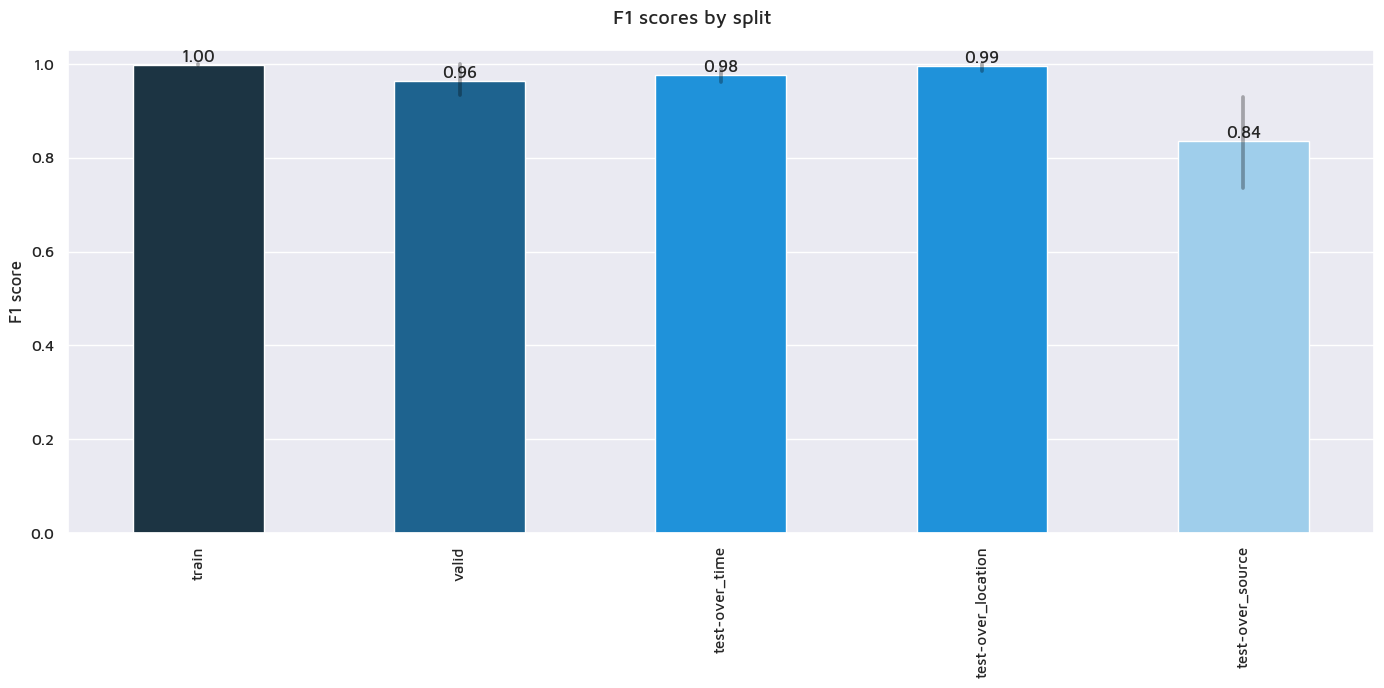

In [7]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle(f'F1 scores by split')
plot = sns.barplot(
    data = results_df,
    x = "split",
    y = "f1_score",
    # color = "#0099f9",
    palette = [train_color, valid_color, test_color, test_color, test_pale_color],
    order = ["train", "valid", "test-over_time", "test-over_location", "test-over_source"],
    errcolor = (0,0,0,0.3),
    width = 0.5,
)
plt.setp(plot.get_xticklabels(), rotation=90)
# plt.legend(loc='lower left')
plt.ylim(0, 1.03)
plt.ylabel("F1 score")
plt.xlabel("")
plt.tight_layout()

for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

plt.savefig(f"plots_for_paper/plots/f1_all_scores.png")

#### Plot mAP scores combined

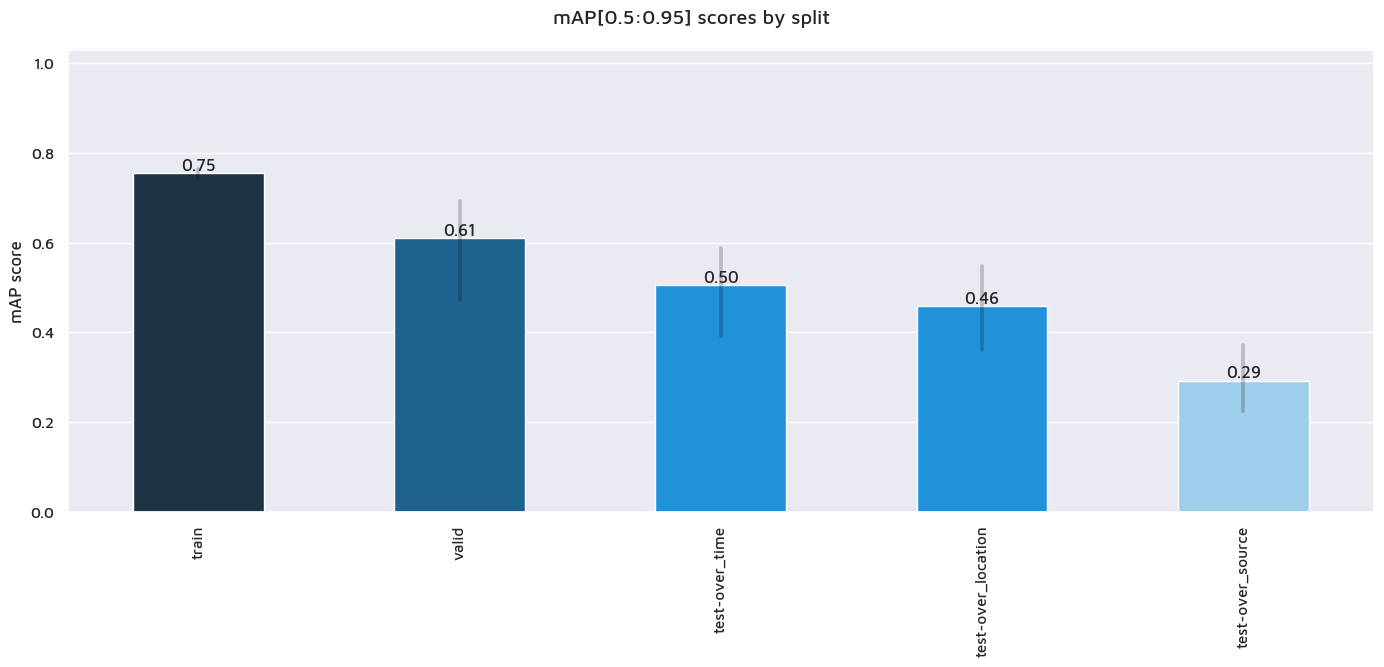

In [8]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle(f'mAP[0.5:0.95] scores by split')
plot = sns.barplot(
    data = results_df,
    x = "split",
    y = "mAP[0.5:0.95]",
    # color = "#0099f9",
    palette = [train_color, valid_color, test_color, test_color, test_pale_color],
    order = ["train", "valid", "test-over_time", "test-over_location", "test-over_source"],
    errcolor = (0,0,0,0.2),
    width = 0.5,
)
plt.setp(plot.get_xticklabels(), rotation=90)
# plt.legend(loc='lower left')
plt.ylim(0, 1.03)
plt.tight_layout()
plt.ylabel("mAP score")
plt.xlabel("")

for container in plot.containers:
    plot.bar_label(container, fmt="%.2f")

plt.savefig(f"plots_for_paper/plots/mAP[0.5:0.95]_all_scores.png")

#### Plot F1 scores detailed

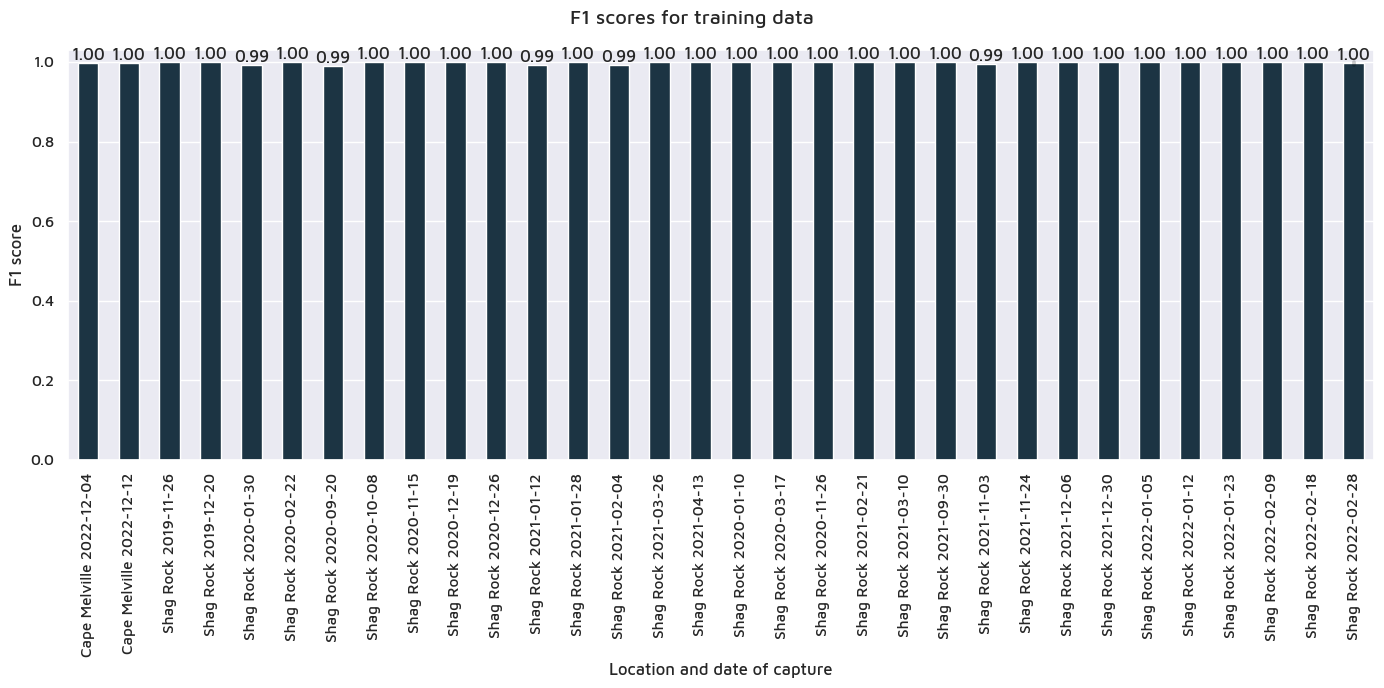

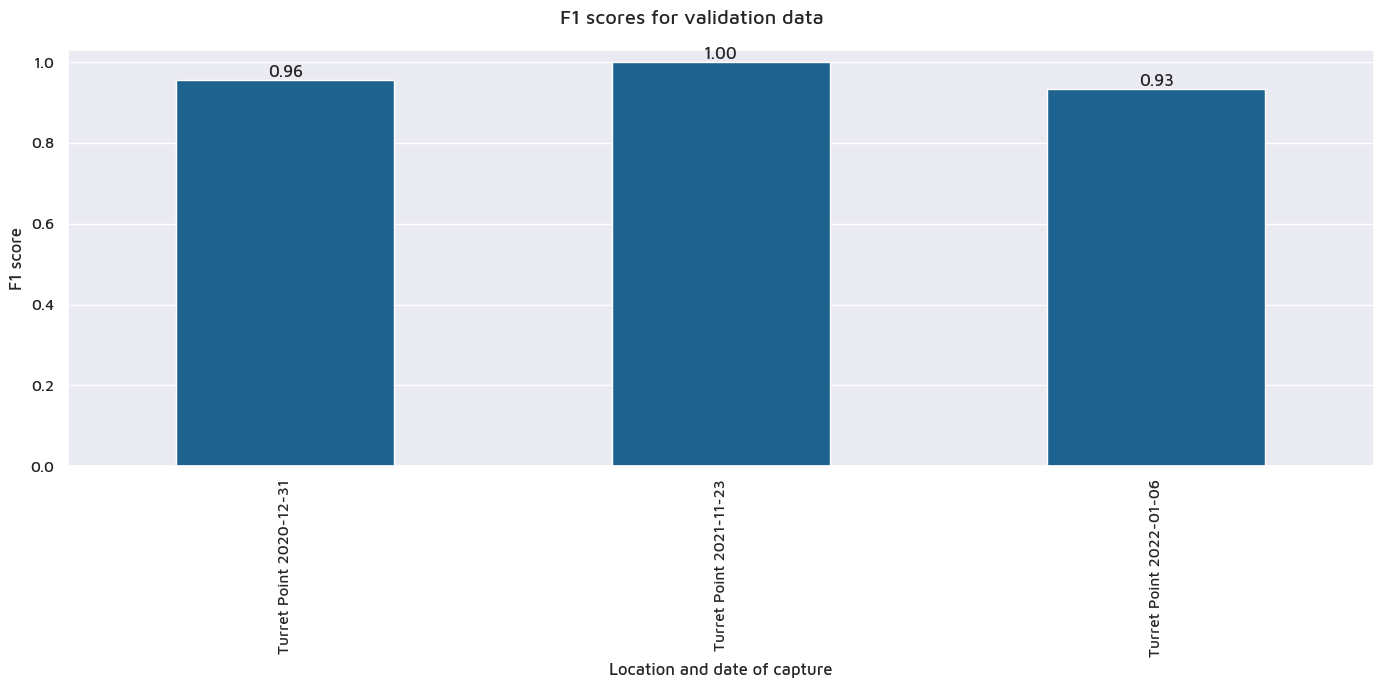

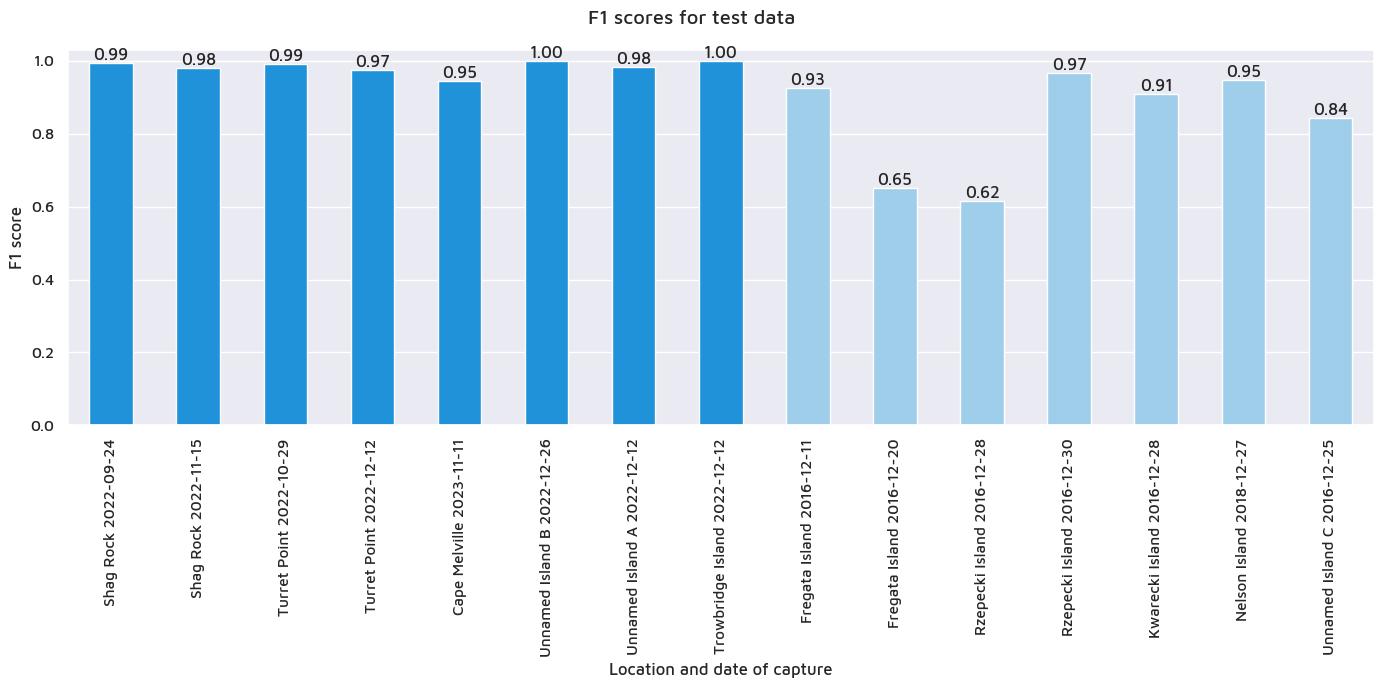

In [9]:
for split in ["train", "valid", "test"]:
    if split == "test":
        fig = plt.figure(figsize=(14, 7))
        fig.suptitle(f'F1 scores for {title_from_split[split]} data')
        plot = sns.barplot(
            data = results_df[results_df.split.str.startswith(split)],
            x = "uni_name",
            y = "f1_score",
            # color = locals()[f"{split}_color"],
            palette = [test_color]*8 + [test_pale_color]*7,
            order = [
                "Shag Rock 2022-09-24",
                "Shag Rock 2022-11-15",
                "Turret Point 2022-10-29",
                "Turret Point 2022-12-12",
                "Cape Melville 2023-11-11",
                "Unnamed Island B 2022-12-26",
                "Unnamed Island A 2022-12-12",
                "Trowbridge Island 2022-12-12",
                "Fregata Island 2016-12-11",
                "Fregata Island 2016-12-20",
                "Rzepecki Island 2016-12-28",
                "Rzepecki Island 2016-12-30",
                "Kwarecki Island 2016-12-28",
                "Nelson Island 2018-12-27",
                "Unnamed Island C 2016-12-25",
            ],
            errcolor = (0,0,0,0.2),
            width = 0.5,
        )
    else:
        fig = plt.figure(figsize=(14,7))
        fig.suptitle(f'F1 scores for {title_from_split[split]} data')
        plot = sns.barplot(
            data = results_df[results_df.split.str.startswith(split)],
            x = "uni_name",
            y = "f1_score",
            color = locals()[f"{split}_color"],
            errcolor = (0,0,0,0.2),
            width = 0.5,
        )
    plt.setp(plot.get_xticklabels(), rotation=90)
    # plt.legend(loc='lower left')
    plt.xlabel("Location and date of capture")
    plt.ylabel("F1 score")
    plt.ylim(0, 1.03)
    plt.tight_layout()

    for container in plot.containers:
        plot.bar_label(container, fmt="%.2f")

    plt.savefig(f"plots_for_paper/plots/f1_{split}_scores.png")

#### Plot mAP scores detailed

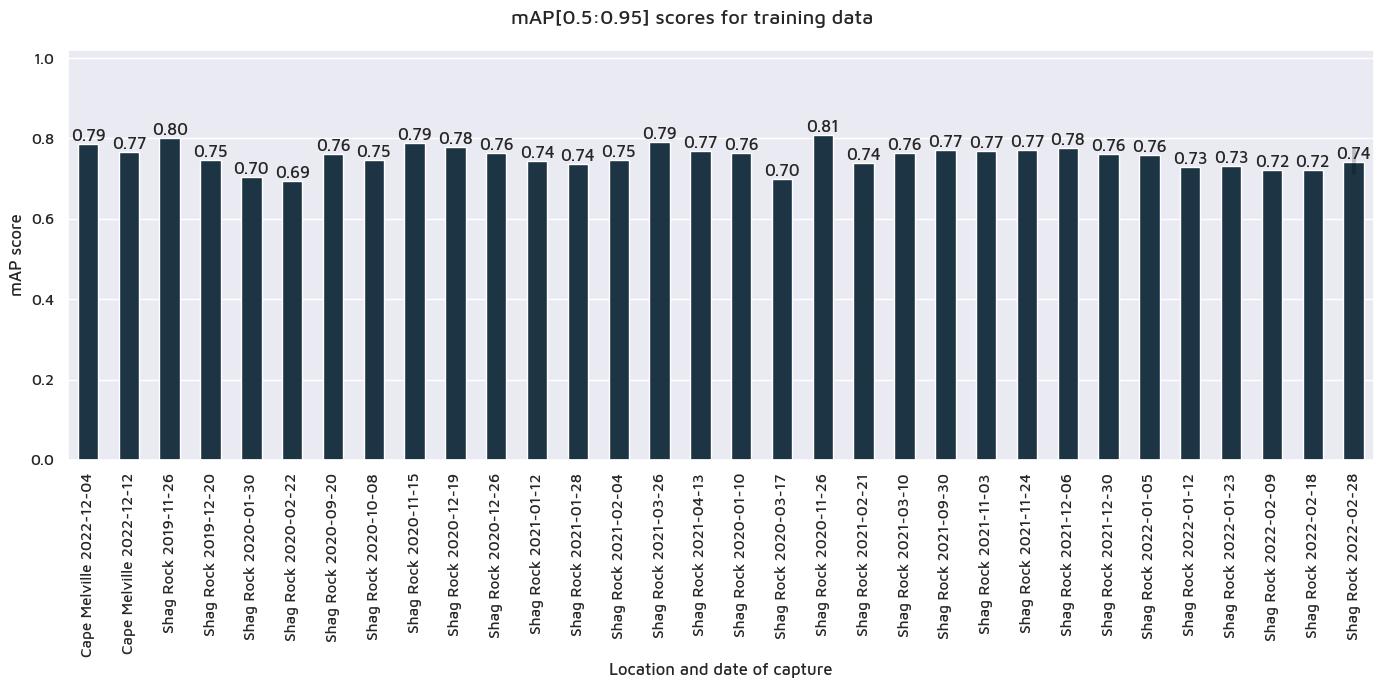

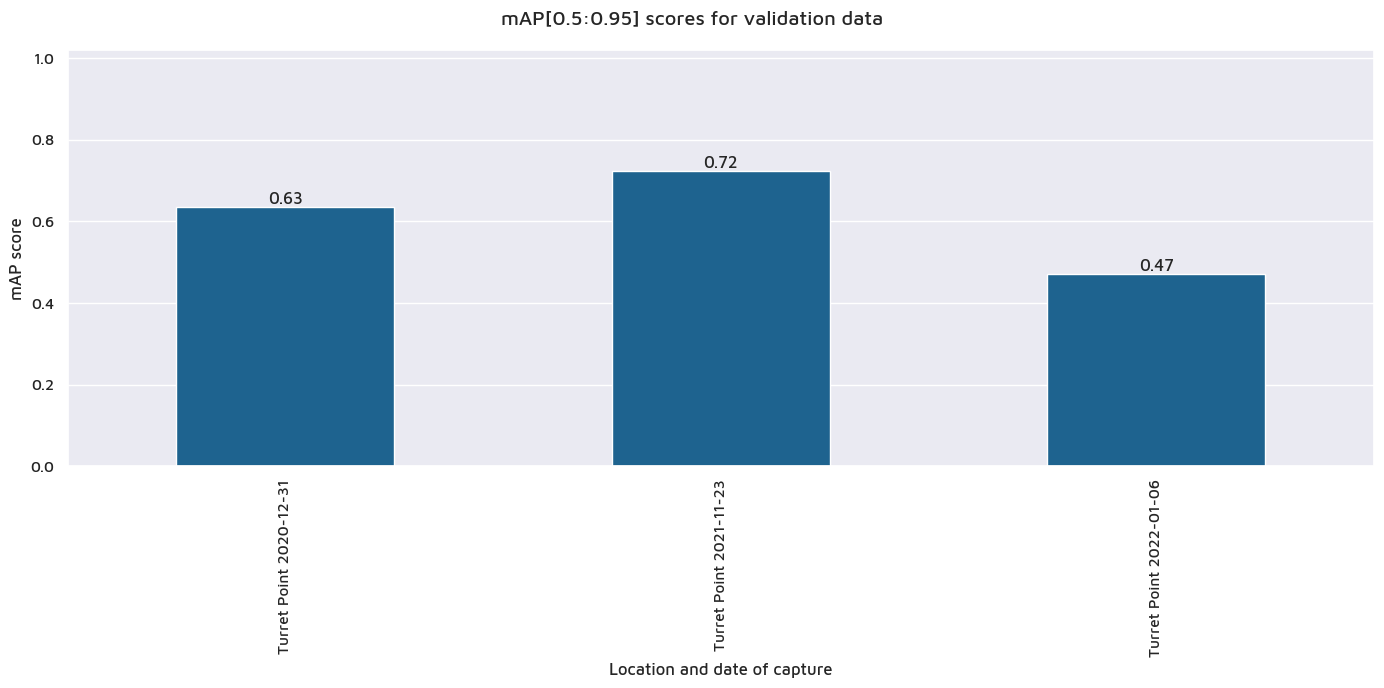

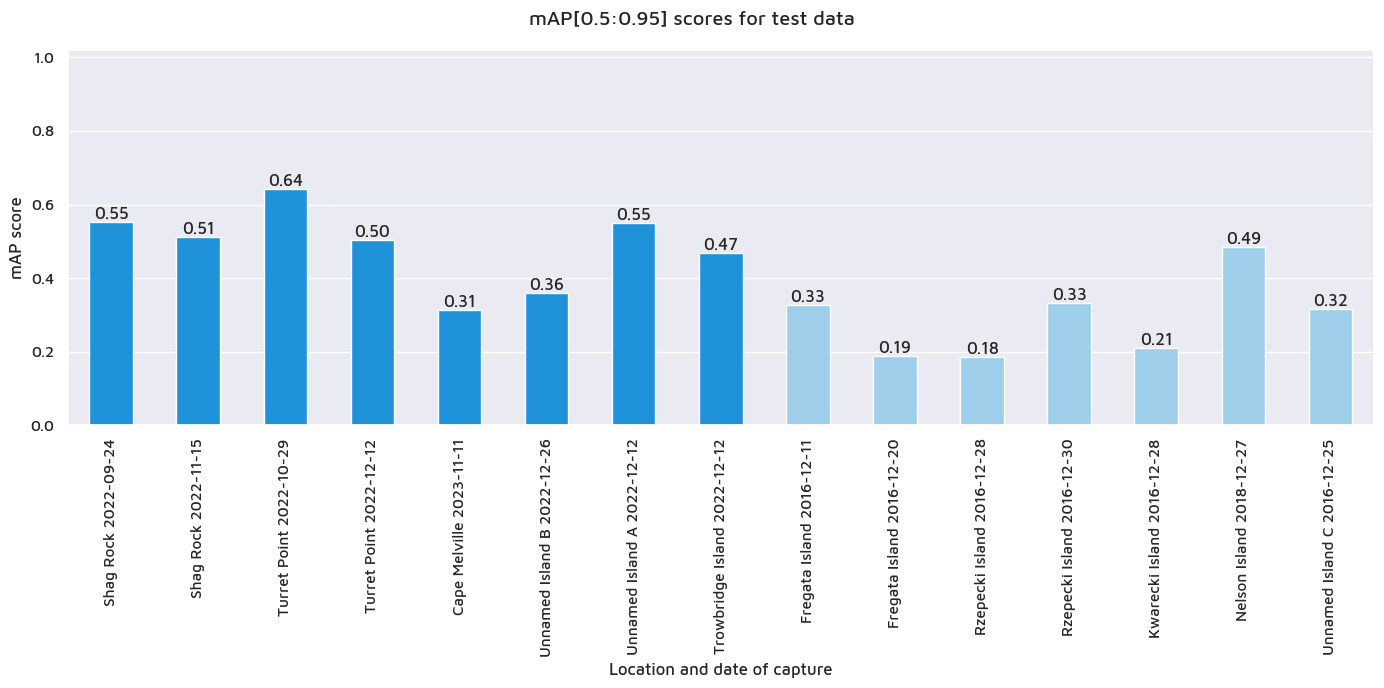

In [10]:
for split in ["train", "valid", "test"]:
    if split == "test":
        fig = plt.figure(figsize=(14, 7))
        fig.suptitle(f'mAP[0.5:0.95] scores for {title_from_split[split]} data')
        plot = sns.barplot(
            data = results_df[results_df.split.str.startswith(split)],
            x = "uni_name",
            y = "mAP[0.5:0.95]",
            # color = locals()[f"{split}_color"],
            palette = [test_color]*8 + [test_pale_color]*7,
            order = [
                "Shag Rock 2022-09-24",
                "Shag Rock 2022-11-15",
                "Turret Point 2022-10-29",
                "Turret Point 2022-12-12",
                "Cape Melville 2023-11-11",
                "Unnamed Island B 2022-12-26",
                "Unnamed Island A 2022-12-12",
                "Trowbridge Island 2022-12-12",
                "Fregata Island 2016-12-11",
                "Fregata Island 2016-12-20",
                "Rzepecki Island 2016-12-28",
                "Rzepecki Island 2016-12-30",
                "Kwarecki Island 2016-12-28",
                "Nelson Island 2018-12-27",
                "Unnamed Island C 2016-12-25",
            ],
            errcolor = (0,0,0,0.2),
            width = 0.5,
        )
    else:
        fig = plt.figure(figsize=(14, 7))
        fig.suptitle(f'mAP[0.5:0.95] scores for {title_from_split[split]} data')
        plot = sns.barplot(
            data = results_df[results_df.split.str.startswith(split)],
            x = "uni_name",
            y = "mAP[0.5:0.95]",
            color = locals()[f"{split}_color"],
            errcolor = (0,0,0,0.2),
            width = 0.5,
        )
    plt.setp(plot.get_xticklabels(), rotation=90)
    # plt.legend(loc='lower left')
    plt.ylabel("mAP score")
    plt.xlabel("Location and date of capture")
    plt.ylim(0, 1.02)
    plt.tight_layout()

    for container in plot.containers:
        plot.bar_label(container, fmt="%.2f")

    plt.savefig(f"plots_for_paper/plots/mAP_{split}.png")

## Prepare data for the table in the paper with scores

In [11]:
df = results_df[["uni_name", "split", "f1_score", "mAP[0.5:0.95]", "n_nests", "n_preds", "tp", "fp", "fn"]]
df.columns = ["Location and date of capture", "Split", "F1 score", "mAP[0.5:0.95]", "n_nests", "n_preds", "TP", "FP", "FN"]
df.to_csv("plots_for_paper/results_for_paper.csv", index=False, float_format='%.3f')